In [5]:
pip install fastf1

     ---------------------------------------- 79.4/79.4 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 48.5/48.5 kB ? eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd

plotting.setup_mpl()
pd.options.mode.chained_assignment = None
#ff1.Cache.enable_cache('test/') 
year = 2021
race = 'Russia'
type = 'R'
driver = 'HAM'
race = ff1.get_session(year, race, type)
laps = race.load_laps(with_telemetry=True)

laps['LapNumber'] = laps['LapNumber'] - 1
laps = laps.loc[laps['LapNumber'] >= 45]
drivers = pd.unique(laps['Driver'])
telemetry = pd.DataFrame()

for driver in drivers:
    print(f'driver={driver}')
    driver_laps = laps.pick_driver(driver)
    
    for lap in driver_laps.iterlaps():
        print(f'lap={lap}')
        driver_telemetry = lap[1].get_telemetry().add_distance()
      
        driver_telemetry['Driver'] = driver
      
        driver_telemetry['Lap'] = lap[1]['LapNumber']
      
        driver_telemetry['Compound'] = lap[1]['Compound']
    
        telemetry = telemetry.append(driver_telemetry)


telemetry = telemetry[['Driver', 'Lap', 'Distance', 'Compound', 'Speed']]
telemetry['Compound'].loc[telemetry['Compound'] != 'INTERMEDIATE'] = 'SLICK'

minisectors_len = max(telemetry['Distance']) / 25
minisectors = []

for i in range(0, (24)):
    minisectors.append(minisectors_len * (i + 1))

average_speed = telemetry.groupby(['Lap', 'Compound'])['Speed'].mean().reset_index()

fastest_compounds = average_speed.loc[average_speed.groupby(['Lap'])['Speed'].idxmax()]
fastest_compounds = fastest_compounds[['Lap', 'Compound']].rename(columns={'Compound': 'Fastest_compound'})

print(fastest_compounds.to_string())


C:\Users\ssasi001\Anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Russian Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['44', '3

driver=HAM
lap=(45, Time                      0 days 02:20:03.961000
DriverNumber                                  44
LapTime                   0 days 00:01:38.942000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.421000
Sector2Time               0 days 00:00:34.746000
Sector3Time               0 days 00:00:28.775000
Sector1SessionTime        0 days 02:19:00.440000
Sector2SessionTime        0 days 02:19:35.186000
Sector3SessionTime        0 days 02:20:03.961000
SpeedI1                                    242.0
SpeedI2                                    294.0
SpeedFL                                    162.0
SpeedST                                    297.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    20.0
FreshTyre                                   True


C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(46, Time                      0 days 02:21:46.573000
DriverNumber                                  44
LapTime                   0 days 00:01:42.612000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.607000
Sector2Time               0 days 00:00:37.453000
Sector3Time               0 days 00:00:29.552000
Sector1SessionTime        0 days 02:20:39.568000
Sector2SessionTime        0 days 02:21:17.021000
Sector3SessionTime        0 days 02:21:46.573000
SpeedI1                                    215.0
SpeedI2                                    318.0
SpeedFL                                    160.0
SpeedST                                    298.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    21.0
FreshTyre                                   True
Stint      

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(47, Time                      0 days 02:23:42.303000
DriverNumber                                  44
LapTime                   0 days 00:01:55.730000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.142000
Sector2Time               0 days 00:00:44.200000
Sector3Time               0 days 00:00:33.388000
Sector1SessionTime        0 days 02:22:24.715000
Sector2SessionTime        0 days 02:23:08.915000
Sector3SessionTime        0 days 02:23:42.303000
SpeedI1                                    183.0
SpeedI2                                    258.0
SpeedFL                                    164.0
SpeedST                                    244.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    22.0
FreshTyre                                   True
Stint      

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(48, Time                      0 days 02:25:39.182000
DriverNumber                                  44
LapTime                   0 days 00:01:56.879000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                 0 days 02:25:30.666000
Sector1Time               0 days 00:00:37.695000
Sector2Time               0 days 00:00:43.480000
Sector3Time               0 days 00:00:35.704000
Sector1SessionTime        0 days 02:24:19.998000
Sector2SessionTime        0 days 02:25:03.478000
Sector3SessionTime        0 days 02:25:39.182000
SpeedI1                                    189.0
SpeedI2                                    295.0
SpeedFL                                      NaN
SpeedST                                    254.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    23.0
FreshTyre                                   True
Stint      

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(49, Time                      0 days 02:27:45.498000
DriverNumber                                  44
LapTime                   0 days 00:02:06.316000
LapNumber                                     49
PitOutTime                0 days 02:26:00.701000
PitInTime                                    NaT
Sector1Time               0 days 00:00:56.972000
Sector2Time               0 days 00:00:38.328000
Sector3Time               0 days 00:00:31.016000
Sector1SessionTime        0 days 02:26:36.154000
Sector2SessionTime        0 days 02:27:14.482000
Sector3SessionTime        0 days 02:27:45.498000
SpeedI1                                    205.0
SpeedI2                                    292.0
SpeedFL                                    146.0
SpeedST                                    277.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint      

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(50, Time                      0 days 02:29:39.030000
DriverNumber                                  44
LapTime                   0 days 00:01:53.532000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.164000
Sector2Time               0 days 00:00:41.092000
Sector3Time               0 days 00:00:33.276000
Sector1SessionTime        0 days 02:28:24.662000
Sector2SessionTime        0 days 02:29:05.754000
Sector3SessionTime        0 days 02:29:39.030000
SpeedI1                                    162.0
SpeedI2                                    297.0
SpeedFL                                    145.0
SpeedST                                    272.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint      

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(51, Time                      0 days 02:31:31.689000
DriverNumber                                  44
LapTime                   0 days 00:01:52.659000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.793000
Sector2Time               0 days 00:00:39.803000
Sector3Time               0 days 00:00:33.063000
Sector1SessionTime        0 days 02:30:18.823000
Sector2SessionTime        0 days 02:30:58.626000
Sector3SessionTime        0 days 02:31:31.689000
SpeedI1                                    187.0
SpeedI2                                    296.0
SpeedFL                                    149.0
SpeedST                                    242.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     3.0
FreshTyre                                   True
Stint      

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(52, Time                      0 days 02:33:23.154000
DriverNumber                                  44
LapTime                   0 days 00:01:51.465000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.081000
Sector2Time               0 days 00:00:39.394000
Sector3Time               0 days 00:00:32.990000
Sector1SessionTime        0 days 02:32:10.770000
Sector2SessionTime        0 days 02:32:50.164000
Sector3SessionTime        0 days 02:33:23.154000
SpeedI1                                    190.0
SpeedI2                                    299.0
SpeedFL                                    136.0
SpeedST                                    254.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     4.0
FreshTyre                                   True
Stint      

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=VER
lap=(98, Time                      0 days 02:20:49.026000
DriverNumber                                  33
LapTime                   0 days 00:01:40.497000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.563000
Sector2Time               0 days 00:00:35.429000
Sector3Time               0 days 00:00:29.505000
Sector1SessionTime        0 days 02:19:44.092000
Sector2SessionTime        0 days 02:20:19.521000
Sector3SessionTime        0 days 02:20:49.026000
SpeedI1                                    250.0
SpeedI2                                    299.0
SpeedFL                                    162.0
SpeedST                                    296.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    20.0
FreshTyre                                   True


C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(99, Time                      0 days 02:22:35.958000
DriverNumber                                  33
LapTime                   0 days 00:01:46.932000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.780000
Sector2Time               0 days 00:00:40.644000
Sector3Time               0 days 00:00:29.508000
Sector1SessionTime        0 days 02:21:25.806000
Sector2SessionTime        0 days 02:22:06.450000
Sector3SessionTime        0 days 02:22:35.958000
SpeedI1                                    196.0
SpeedI2                                    298.0
SpeedFL                                    162.0
SpeedST                                    294.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    21.0
FreshTyre                                   True
Stint      

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(100, Time                      0 days 02:24:39.038000
DriverNumber                                  33
LapTime                   0 days 00:02:03.080000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                 0 days 02:24:30.622000
Sector1Time               0 days 00:00:39.377000
Sector2Time               0 days 00:00:44.445000
Sector3Time               0 days 00:00:39.258000
Sector1SessionTime        0 days 02:23:15.335000
Sector2SessionTime        0 days 02:23:59.780000
Sector3SessionTime        0 days 02:24:39.038000
SpeedI1                                    209.0
SpeedI2                                    303.0
SpeedFL                                      NaN
SpeedST                                    247.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    22.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(101, Time                      0 days 02:26:46.688000
DriverNumber                                  33
LapTime                   0 days 00:02:07.650000
LapNumber                                     48
PitOutTime                0 days 02:25:01.605000
PitInTime                                    NaT
Sector1Time               0 days 00:00:57.860000
Sector2Time               0 days 00:00:37.521000
Sector3Time               0 days 00:00:32.269000
Sector1SessionTime        0 days 02:25:36.898000
Sector2SessionTime        0 days 02:26:14.419000
Sector3SessionTime        0 days 02:26:46.688000
SpeedI1                                    222.0
SpeedI2                                    301.0
SpeedFL                                    158.0
SpeedST                                    288.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(102, Time                      0 days 02:28:39.234000
DriverNumber                                  33
LapTime                   0 days 00:01:52.546000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.675000
Sector2Time               0 days 00:00:39.405000
Sector3Time               0 days 00:00:34.466000
Sector1SessionTime        0 days 02:27:25.363000
Sector2SessionTime        0 days 02:28:04.768000
Sector3SessionTime        0 days 02:28:39.234000
SpeedI1                                    199.0
SpeedI2                                    301.0
SpeedFL                                    144.0
SpeedST                                    283.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(103, Time                      0 days 02:30:32.226000
DriverNumber                                  33
LapTime                   0 days 00:01:52.992000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.753000
Sector2Time               0 days 00:00:39.720000
Sector3Time               0 days 00:00:33.519000
Sector1SessionTime        0 days 02:29:18.987000
Sector2SessionTime        0 days 02:29:58.707000
Sector3SessionTime        0 days 02:30:32.226000
SpeedI1                                    212.0
SpeedI2                                    296.0
SpeedFL                                    152.0
SpeedST                                    267.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     3.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(104, Time                      0 days 02:32:24.096000
DriverNumber                                  33
LapTime                   0 days 00:01:51.870000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.945000
Sector2Time               0 days 00:00:39.316000
Sector3Time               0 days 00:00:33.609000
Sector1SessionTime        0 days 02:31:11.171000
Sector2SessionTime        0 days 02:31:50.487000
Sector3SessionTime        0 days 02:32:24.096000
SpeedI1                                    194.0
SpeedI2                                    305.0
SpeedFL                                    147.0
SpeedST                                    266.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     4.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(105, Time                      0 days 02:34:16.387000
DriverNumber                                  33
LapTime                   0 days 00:01:52.291000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.607000
Sector2Time               0 days 00:00:39.250000
Sector3Time               0 days 00:00:33.434000
Sector1SessionTime        0 days 02:33:03.703000
Sector2SessionTime        0 days 02:33:42.953000
Sector3SessionTime        0 days 02:34:16.387000
SpeedI1                                    201.0
SpeedI2                                    305.0
SpeedFL                                    134.0
SpeedST                                    269.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     5.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=SAI
lap=(151, Time                      0 days 02:20:39.982000
DriverNumber                                  55
LapTime                   0 days 00:01:40.703000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.156000
Sector2Time               0 days 00:00:35.630000
Sector3Time               0 days 00:00:28.917000
Sector1SessionTime        0 days 02:19:35.435000
Sector2SessionTime        0 days 02:20:11.065000
Sector3SessionTime        0 days 02:20:39.982000
SpeedI1                                    251.0
SpeedI2                                    289.0
SpeedFL                                    166.0
SpeedST                                    289.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    32.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(152, Time                      0 days 02:22:28.228000
DriverNumber                                  55
LapTime                   0 days 00:01:48.246000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.129000
Sector2Time               0 days 00:00:40.344000
Sector3Time               0 days 00:00:30.773000
Sector1SessionTime        0 days 02:21:17.111000
Sector2SessionTime        0 days 02:21:57.455000
Sector3SessionTime        0 days 02:22:28.228000
SpeedI1                                    219.0
SpeedI2                                    290.0
SpeedFL                                    163.0
SpeedST                                    288.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    33.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(153, Time                      0 days 02:24:41.098000
DriverNumber                                  55
LapTime                   0 days 00:02:12.870000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                 0 days 02:24:32.414000
Sector1Time               0 days 00:00:41.157000
Sector2Time               0 days 00:00:48.951000
Sector3Time               0 days 00:00:42.762000
Sector1SessionTime        0 days 02:23:09.385000
Sector2SessionTime        0 days 02:23:58.336000
Sector3SessionTime        0 days 02:24:41.098000
SpeedI1                                    198.0
SpeedI2                                    288.0
SpeedFL                                      NaN
SpeedST                                    252.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    34.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(154, Time                      0 days 02:26:51.507000
DriverNumber                                  55
LapTime                   0 days 00:02:10.409000
LapNumber                                     48
PitOutTime                0 days 02:25:03.078000
PitInTime                                    NaT
Sector1Time               0 days 00:00:58.399000
Sector2Time               0 days 00:00:38.844000
Sector3Time               0 days 00:00:33.166000
Sector1SessionTime        0 days 02:25:39.497000
Sector2SessionTime        0 days 02:26:18.341000
Sector3SessionTime        0 days 02:26:51.507000
SpeedI1                                    225.0
SpeedI2                                    294.0
SpeedFL                                    147.0
SpeedST                                    287.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     7.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(155, Time                      0 days 02:28:44.792000
DriverNumber                                  55
LapTime                   0 days 00:01:53.285000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.550000
Sector2Time               0 days 00:00:40.550000
Sector3Time               0 days 00:00:33.185000
Sector1SessionTime        0 days 02:27:31.057000
Sector2SessionTime        0 days 02:28:11.607000
Sector3SessionTime        0 days 02:28:44.792000
SpeedI1                                    204.0
SpeedI2                                    294.0
SpeedFL                                    142.0
SpeedST                                    269.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     8.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(156, Time                      0 days 02:30:38.424000
DriverNumber                                  55
LapTime                   0 days 00:01:53.632000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.495000
Sector2Time               0 days 00:00:39.993000
Sector3Time               0 days 00:00:34.144000
Sector1SessionTime        0 days 02:29:24.287000
Sector2SessionTime        0 days 02:30:04.280000
Sector3SessionTime        0 days 02:30:38.424000
SpeedI1                                    211.0
SpeedI2                                    290.0
SpeedFL                                    143.0
SpeedST                                    270.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     9.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(157, Time                      0 days 02:32:32.144000
DriverNumber                                  55
LapTime                   0 days 00:01:53.720000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.407000
Sector2Time               0 days 00:00:39.879000
Sector3Time               0 days 00:00:34.434000
Sector1SessionTime        0 days 02:31:17.831000
Sector2SessionTime        0 days 02:31:57.710000
Sector3SessionTime        0 days 02:32:32.144000
SpeedI1                                    216.0
SpeedI2                                    294.0
SpeedFL                                    143.0
SpeedST                                    274.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                    10.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(158, Time                      0 days 02:34:25.630000
DriverNumber                                  55
LapTime                   0 days 00:01:53.486000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.155000
Sector2Time               0 days 00:00:39.902000
Sector3Time               0 days 00:00:34.429000
Sector1SessionTime        0 days 02:33:11.299000
Sector2SessionTime        0 days 02:33:51.201000
Sector3SessionTime        0 days 02:34:25.630000
SpeedI1                                    213.0
SpeedI2                                    297.0
SpeedFL                                    141.0
SpeedST                                    276.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                    11.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=RIC
lap=(204, Time                      0 days 02:20:45.122000
DriverNumber                                   3
LapTime                   0 days 00:01:40.681000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.908000
Sector2Time               0 days 00:00:35.596000
Sector3Time               0 days 00:00:29.177000
Sector1SessionTime        0 days 02:19:40.349000
Sector2SessionTime        0 days 02:20:15.945000
Sector3SessionTime        0 days 02:20:45.122000
SpeedI1                                    252.0
SpeedI2                                    284.0
SpeedFL                                    163.0
SpeedST                                    287.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    24.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(205, Time                      0 days 02:22:32.545000
DriverNumber                                   3
LapTime                   0 days 00:01:47.423000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.975000
Sector2Time               0 days 00:00:39.603000
Sector3Time               0 days 00:00:30.845000
Sector1SessionTime        0 days 02:21:22.097000
Sector2SessionTime        0 days 02:22:01.700000
Sector3SessionTime        0 days 02:22:32.545000
SpeedI1                                    215.0
SpeedI2                                    295.0
SpeedFL                                    160.0
SpeedST                                    284.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    25.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(206, Time                      0 days 02:24:42.641000
DriverNumber                                   3
LapTime                   0 days 00:02:10.096000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                 0 days 02:24:34.429000
Sector1Time               0 days 00:00:40.137000
Sector2Time               0 days 00:00:49.039000
Sector3Time               0 days 00:00:40.920000
Sector1SessionTime        0 days 02:23:12.682000
Sector2SessionTime        0 days 02:24:01.721000
Sector3SessionTime        0 days 02:24:42.641000
SpeedI1                                    195.0
SpeedI2                                    290.0
SpeedFL                                      NaN
SpeedST                                    242.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    26.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(207, Time                      0 days 02:26:55.144000
DriverNumber                                   3
LapTime                   0 days 00:02:12.503000
LapNumber                                     48
PitOutTime                0 days 02:25:05.379000
PitInTime                                    NaT
Sector1Time               0 days 00:00:59.295000
Sector2Time               0 days 00:00:39.941000
Sector3Time               0 days 00:00:33.267000
Sector1SessionTime        0 days 02:25:41.936000
Sector2SessionTime        0 days 02:26:21.877000
Sector3SessionTime        0 days 02:26:55.144000
SpeedI1                                    218.0
SpeedI2                                    287.0
SpeedFL                                    153.0
SpeedST                                    275.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     4.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(208, Time                      0 days 02:28:48.587000
DriverNumber                                   3
LapTime                   0 days 00:01:53.443000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.494000
Sector2Time               0 days 00:00:40.460000
Sector3Time               0 days 00:00:33.489000
Sector1SessionTime        0 days 02:27:34.638000
Sector2SessionTime        0 days 02:28:15.098000
Sector3SessionTime        0 days 02:28:48.587000
SpeedI1                                    192.0
SpeedI2                                    295.0
SpeedFL                                    143.0
SpeedST                                    264.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     5.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(209, Time                      0 days 02:30:44.190000
DriverNumber                                   3
LapTime                   0 days 00:01:55.603000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:41.284000
Sector2Time               0 days 00:00:40.190000
Sector3Time               0 days 00:00:34.129000
Sector1SessionTime        0 days 02:29:29.871000
Sector2SessionTime        0 days 02:30:10.061000
Sector3SessionTime        0 days 02:30:44.190000
SpeedI1                                    187.0
SpeedI2                                    282.0
SpeedFL                                    142.0
SpeedST                                    251.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     6.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(210, Time                      0 days 02:32:36.296000
DriverNumber                                   3
LapTime                   0 days 00:01:52.106000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.099000
Sector2Time               0 days 00:00:39.316000
Sector3Time               0 days 00:00:33.691000
Sector1SessionTime        0 days 02:31:23.289000
Sector2SessionTime        0 days 02:32:02.605000
Sector3SessionTime        0 days 02:32:36.296000
SpeedI1                                    206.0
SpeedI2                                    283.0
SpeedFL                                    145.0
SpeedST                                    259.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     7.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(211, Time                      0 days 02:34:28.756000
DriverNumber                                   3
LapTime                   0 days 00:01:52.460000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.968000
Sector2Time               0 days 00:00:39.539000
Sector3Time               0 days 00:00:33.953000
Sector1SessionTime        0 days 02:33:15.264000
Sector2SessionTime        0 days 02:33:54.803000
Sector3SessionTime        0 days 02:34:28.756000
SpeedI1                                    195.0
SpeedI2                                    279.0
SpeedFL                                    132.0
SpeedST                                    287.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     8.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=BOT
lap=(257, Time                      0 days 02:21:08.921000
DriverNumber                                  77
LapTime                   0 days 00:01:42.242000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.970000
Sector2Time               0 days 00:00:36.307000
Sector3Time               0 days 00:00:29.965000
Sector1SessionTime        0 days 02:20:02.649000
Sector2SessionTime        0 days 02:20:38.956000
Sector3SessionTime        0 days 02:21:08.921000
SpeedI1                                    215.0
SpeedI2                                    296.0
SpeedFL                                    166.0
SpeedST                                    299.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    18.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(258, Time                      0 days 02:23:05.026000
DriverNumber                                  77
LapTime                   0 days 00:01:56.105000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                 0 days 02:22:56.758000
Sector1Time               0 days 00:00:37.623000
Sector2Time               0 days 00:00:41.631000
Sector3Time               0 days 00:00:36.851000
Sector1SessionTime        0 days 02:21:46.544000
Sector2SessionTime        0 days 02:22:28.175000
Sector3SessionTime        0 days 02:23:05.026000
SpeedI1                                    196.0
SpeedI2                                    292.0
SpeedFL                                      NaN
SpeedST                                    296.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    19.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(259, Time                      0 days 02:25:12.066000
DriverNumber                                  77
LapTime                   0 days 00:02:07.040000
LapNumber                                     47
PitOutTime                0 days 02:23:26.231000
PitInTime                                    NaT
Sector1Time               0 days 00:00:57.341000
Sector2Time               0 days 00:00:38.139000
Sector3Time               0 days 00:00:31.560000
Sector1SessionTime        0 days 02:24:02.367000
Sector2SessionTime        0 days 02:24:40.506000
Sector3SessionTime        0 days 02:25:12.066000
SpeedI1                                    229.0
SpeedI2                                    289.0
SpeedFL                                    158.0
SpeedST                                    288.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(260, Time                      0 days 02:27:01.747000
DriverNumber                                  77
LapTime                   0 days 00:01:49.681000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.774000
Sector2Time               0 days 00:00:38.170000
Sector3Time               0 days 00:00:33.737000
Sector1SessionTime        0 days 02:25:49.840000
Sector2SessionTime        0 days 02:26:28.010000
Sector3SessionTime        0 days 02:27:01.747000
SpeedI1                                    222.0
SpeedI2                                    298.0
SpeedFL                                    151.0
SpeedST                                    281.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(261, Time                      0 days 02:28:57.506000
DriverNumber                                  77
LapTime                   0 days 00:01:55.759000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:41.132000
Sector2Time               0 days 00:00:41.405000
Sector3Time               0 days 00:00:33.222000
Sector1SessionTime        0 days 02:27:42.879000
Sector2SessionTime        0 days 02:28:24.284000
Sector3SessionTime        0 days 02:28:57.506000
SpeedI1                                    190.0
SpeedI2                                    292.0
SpeedFL                                    145.0
SpeedST                                    266.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     3.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(262, Time                      0 days 02:30:49.115000
DriverNumber                                  77
LapTime                   0 days 00:01:51.609000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.075000
Sector2Time               0 days 00:00:39.423000
Sector3Time               0 days 00:00:33.111000
Sector1SessionTime        0 days 02:29:36.581000
Sector2SessionTime        0 days 02:30:16.004000
Sector3SessionTime        0 days 02:30:49.115000
SpeedI1                                    213.0
SpeedI2                                    290.0
SpeedFL                                    151.0
SpeedST                                    261.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     4.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(263, Time                      0 days 02:32:40.378000
DriverNumber                                  77
LapTime                   0 days 00:01:51.263000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.504000
Sector2Time               0 days 00:00:38.684000
Sector3Time               0 days 00:00:33.075000
Sector1SessionTime        0 days 02:31:28.619000
Sector2SessionTime        0 days 02:32:07.303000
Sector3SessionTime        0 days 02:32:40.378000
SpeedI1                                    221.0
SpeedI2                                    297.0
SpeedFL                                    150.0
SpeedST                                    267.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     5.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(264, Time                      0 days 02:34:30.683000
DriverNumber                                  77
LapTime                   0 days 00:01:50.305000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.044000
Sector2Time               0 days 00:00:39.013000
Sector3Time               0 days 00:00:33.248000
Sector1SessionTime        0 days 02:33:18.422000
Sector2SessionTime        0 days 02:33:57.435000
Sector3SessionTime        0 days 02:34:30.683000
SpeedI1                                    218.0
SpeedI2                                    305.0
SpeedFL                                    146.0
SpeedST                                    283.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     6.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=ALO
lap=(310, Time                      0 days 02:20:46.314000
DriverNumber                                  14
LapTime                   0 days 00:01:40.673000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.611000
Sector2Time               0 days 00:00:35.699000
Sector3Time               0 days 00:00:29.363000
Sector1SessionTime        0 days 02:19:41.252000
Sector2SessionTime        0 days 02:20:16.951000
Sector3SessionTime        0 days 02:20:46.314000
SpeedI1                                    252.0
SpeedI2                                    293.0
SpeedFL                                    166.0
SpeedST                                    294.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    10.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(311, Time                      0 days 02:22:31.407000
DriverNumber                                  14
LapTime                   0 days 00:01:45.093000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.630000
Sector2Time               0 days 00:00:38.551000
Sector3Time               0 days 00:00:29.912000
Sector1SessionTime        0 days 02:21:22.944000
Sector2SessionTime        0 days 02:22:01.495000
Sector3SessionTime        0 days 02:22:31.407000
SpeedI1                                    202.0
SpeedI2                                    306.0
SpeedFL                                    172.0
SpeedST                                      NaN
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    11.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(312, Time                      0 days 02:24:30.826000
DriverNumber                                  14
LapTime                   0 days 00:01:59.419000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.256000
Sector2Time               0 days 00:00:45.574000
Sector3Time               0 days 00:00:34.589000
Sector1SessionTime        0 days 02:23:10.663000
Sector2SessionTime        0 days 02:23:56.237000
Sector3SessionTime        0 days 02:24:30.826000
SpeedI1                                    206.0
SpeedI2                                    284.0
SpeedFL                                    167.0
SpeedST                                    239.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    12.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(313, Time                      0 days 02:26:22.889000
DriverNumber                                  14
LapTime                   0 days 00:01:52.063000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.189000
Sector2Time               0 days 00:00:41.590000
Sector3Time               0 days 00:00:31.284000
Sector1SessionTime        0 days 02:25:10.015000
Sector2SessionTime        0 days 02:25:51.605000
Sector3SessionTime        0 days 02:26:22.889000
SpeedI1                                    204.0
SpeedI2                                    297.0
SpeedFL                                    167.0
SpeedST                                    270.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    13.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(314, Time                      0 days 02:28:42.267000
DriverNumber                                  14
LapTime                   0 days 00:02:19.378000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                 0 days 02:28:33.493000
Sector1Time               0 days 00:00:42.154000
Sector2Time               0 days 00:00:52.812000
Sector3Time               0 days 00:00:44.412000
Sector1SessionTime        0 days 02:27:05.043000
Sector2SessionTime        0 days 02:27:57.855000
Sector3SessionTime        0 days 02:28:42.267000
SpeedI1                                    166.0
SpeedI2                                    245.0
SpeedFL                                      NaN
SpeedST                                    243.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    14.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(315, Time                      0 days 02:31:00.813000
DriverNumber                                  14
LapTime                   0 days 00:02:18.546000
LapNumber                                     50
PitOutTime                0 days 02:29:04.073000
PitInTime                                    NaT
Sector1Time               0 days 00:01:01.767000
Sector2Time               0 days 00:00:42.490000
Sector3Time               0 days 00:00:34.289000
Sector1SessionTime        0 days 02:29:44.034000
Sector2SessionTime        0 days 02:30:26.524000
Sector3SessionTime        0 days 02:31:00.813000
SpeedI1                                    167.0
SpeedI2                                    291.0
SpeedFL                                    154.0
SpeedST                                    227.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(316, Time                      0 days 02:32:52.039000
DriverNumber                                  14
LapTime                   0 days 00:01:51.226000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.031000
Sector2Time               0 days 00:00:39.422000
Sector3Time               0 days 00:00:32.773000
Sector1SessionTime        0 days 02:31:39.844000
Sector2SessionTime        0 days 02:32:19.266000
Sector3SessionTime        0 days 02:32:52.039000
SpeedI1                                    209.0
SpeedI2                                    292.0
SpeedFL                                    154.0
SpeedST                                    268.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(317, Time                      0 days 02:34:44.478000
DriverNumber                                  14
LapTime                   0 days 00:01:52.439000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.483000
Sector2Time               0 days 00:00:39.785000
Sector3Time               0 days 00:00:34.171000
Sector1SessionTime        0 days 02:33:30.522000
Sector2SessionTime        0 days 02:34:10.307000
Sector3SessionTime        0 days 02:34:44.478000
SpeedI1                                    205.0
SpeedI2                                    287.0
SpeedFL                                    148.0
SpeedST                                    284.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     3.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=NOR
lap=(363, Time                      0 days 02:20:02.782000
DriverNumber                                   4
LapTime                   0 days 00:01:39.120000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.684000
Sector2Time               0 days 00:00:34.862000
Sector3Time               0 days 00:00:28.574000
Sector1SessionTime        0 days 02:18:59.346000
Sector2SessionTime        0 days 02:19:34.208000
Sector3SessionTime        0 days 02:20:02.782000
SpeedI1                                    249.0
SpeedI2                                    280.0
SpeedFL                                    167.0
SpeedST                                    281.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    18.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(364, Time                      0 days 02:21:45.565000
DriverNumber                                   4
LapTime                   0 days 00:01:42.783000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.198000
Sector2Time               0 days 00:00:37.714000
Sector3Time               0 days 00:00:28.871000
Sector1SessionTime        0 days 02:20:38.980000
Sector2SessionTime        0 days 02:21:16.694000
Sector3SessionTime        0 days 02:21:45.565000
SpeedI1                                    235.0
SpeedI2                                    282.0
SpeedFL                                    166.0
SpeedST                                    283.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    19.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(365, Time                      0 days 02:23:40.204000
DriverNumber                                   4
LapTime                   0 days 00:01:54.639000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.234000
Sector2Time               0 days 00:00:44.476000
Sector3Time               0 days 00:00:32.929000
Sector1SessionTime        0 days 02:22:22.799000
Sector2SessionTime        0 days 02:23:07.275000
Sector3SessionTime        0 days 02:23:40.204000
SpeedI1                                    211.0
SpeedI2                                    277.0
SpeedFL                                    163.0
SpeedST                                    280.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    20.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(366, Time                      0 days 02:25:32.989000
DriverNumber                                   4
LapTime                   0 days 00:01:52.785000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.532000
Sector2Time               0 days 00:00:43.596000
Sector3Time               0 days 00:00:31.657000
Sector1SessionTime        0 days 02:24:17.736000
Sector2SessionTime        0 days 02:25:01.332000
Sector3SessionTime        0 days 02:25:32.989000
SpeedI1                                    198.0
SpeedI2                                    288.0
SpeedFL                                    146.0
SpeedST                                    288.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    21.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(367, Time                      0 days 02:27:30.491000
DriverNumber                                   4
LapTime                   0 days 00:01:57.502000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.877000
Sector2Time               0 days 00:00:45.140000
Sector3Time               0 days 00:00:34.485000
Sector1SessionTime        0 days 02:26:10.866000
Sector2SessionTime        0 days 02:26:56.006000
Sector3SessionTime        0 days 02:27:30.491000
SpeedI1                                    187.0
SpeedI2                                    292.0
SpeedFL                                    113.0
SpeedST                                    286.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    22.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(368, Time                      0 days 02:30:41.588000
DriverNumber                                   4
LapTime                                      NaT
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                 0 days 02:30:31.563000
Sector1Time               0 days 00:00:52.556000
Sector2Time               0 days 00:01:19.683000
Sector3Time               0 days 00:00:58.842000
Sector1SessionTime        0 days 02:28:23.081000
Sector2SessionTime        0 days 02:29:42.757000
Sector3SessionTime        0 days 02:30:41.689000
SpeedI1                                    134.0
SpeedI2                                    187.0
SpeedFL                                      NaN
SpeedST                                    246.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    23.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(369, Time                      0 days 02:32:57.965000
DriverNumber                                   4
LapTime                   0 days 00:02:16.377000
LapNumber                                     51
PitOutTime                0 days 02:31:04.154000
PitInTime                                    NaT
Sector1Time               0 days 00:01:02.344000
Sector2Time               0 days 00:00:39.649000
Sector3Time               0 days 00:00:34.384000
Sector1SessionTime        0 days 02:31:43.932000
Sector2SessionTime        0 days 02:32:23.581000
Sector3SessionTime        0 days 02:32:57.965000
SpeedI1                                    210.0
SpeedI2                                    299.0
SpeedFL                                    148.0
SpeedST                                    247.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     6.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(370, Time                      0 days 02:34:50.382000
DriverNumber                                   4
LapTime                   0 days 00:01:52.417000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.838000
Sector2Time               0 days 00:00:39.386000
Sector3Time               0 days 00:00:34.193000
Sector1SessionTime        0 days 02:33:36.803000
Sector2SessionTime        0 days 02:34:16.189000
Sector3SessionTime        0 days 02:34:50.382000
SpeedI1                                    220.0
SpeedI2                                    296.0
SpeedFL                                    146.0
SpeedST                                    291.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     7.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=RAI
lap=(416, Time                      0 days 02:21:07.607000
DriverNumber                                   7
LapTime                   0 days 00:01:41.804000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.026000
Sector2Time               0 days 00:00:35.890000
Sector3Time               0 days 00:00:29.888000
Sector1SessionTime        0 days 02:20:01.829000
Sector2SessionTime        0 days 02:20:37.719000
Sector3SessionTime        0 days 02:21:07.607000
SpeedI1                                    244.0
SpeedI2                                    302.0
SpeedFL                                    156.0
SpeedST                                    307.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    31.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(417, Time                      0 days 02:23:06.058000
DriverNumber                                   7
LapTime                   0 days 00:01:58.451000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                 0 days 02:22:58.015000
Sector1Time               0 days 00:00:37.350000
Sector2Time               0 days 00:00:43.602000
Sector3Time               0 days 00:00:37.499000
Sector1SessionTime        0 days 02:21:44.957000
Sector2SessionTime        0 days 02:22:28.559000
Sector3SessionTime        0 days 02:23:06.058000
SpeedI1                                    215.0
SpeedI2                                    266.0
SpeedFL                                      NaN
SpeedST                                    302.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    32.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(418, Time                      0 days 02:25:16.465000
DriverNumber                                   7
LapTime                   0 days 00:02:10.407000
LapNumber                                     47
PitOutTime                0 days 02:23:28.403000
PitInTime                                    NaT
Sector1Time               0 days 00:00:58.342000
Sector2Time               0 days 00:00:38.655000
Sector3Time               0 days 00:00:33.410000
Sector1SessionTime        0 days 02:24:04.400000
Sector2SessionTime        0 days 02:24:43.055000
Sector3SessionTime        0 days 02:25:16.465000
SpeedI1                                    236.0
SpeedI2                                    297.0
SpeedFL                                    141.0
SpeedST                                    246.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(419, Time                      0 days 02:27:11.084000
DriverNumber                                   7
LapTime                   0 days 00:01:54.619000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.639000
Sector2Time               0 days 00:00:39.623000
Sector3Time               0 days 00:00:36.357000
Sector1SessionTime        0 days 02:25:55.104000
Sector2SessionTime        0 days 02:26:34.727000
Sector3SessionTime        0 days 02:27:11.084000
SpeedI1                                    224.0
SpeedI2                                    303.0
SpeedFL                                    135.0
SpeedST                                    273.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(420, Time                      0 days 02:29:06.701000
DriverNumber                                   7
LapTime                   0 days 00:01:55.617000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.289000
Sector2Time               0 days 00:00:41.175000
Sector3Time               0 days 00:00:34.153000
Sector1SessionTime        0 days 02:27:51.373000
Sector2SessionTime        0 days 02:28:32.548000
Sector3SessionTime        0 days 02:29:06.701000
SpeedI1                                    194.0
SpeedI2                                    302.0
SpeedFL                                    138.0
SpeedST                                    270.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     3.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(421, Time                      0 days 02:31:03.218000
DriverNumber                                   7
LapTime                   0 days 00:01:56.517000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.556000
Sector2Time               0 days 00:00:41.232000
Sector3Time               0 days 00:00:34.729000
Sector1SessionTime        0 days 02:29:47.257000
Sector2SessionTime        0 days 02:30:28.489000
Sector3SessionTime        0 days 02:31:03.218000
SpeedI1                                    204.0
SpeedI2                                    295.0
SpeedFL                                    142.0
SpeedST                                    265.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     4.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(422, Time                      0 days 02:32:57.507000
DriverNumber                                   7
LapTime                   0 days 00:01:54.289000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.935000
Sector2Time               0 days 00:00:40.016000
Sector3Time               0 days 00:00:34.338000
Sector1SessionTime        0 days 02:31:43.153000
Sector2SessionTime        0 days 02:32:23.169000
Sector3SessionTime        0 days 02:32:57.507000
SpeedI1                                    207.0
SpeedI2                                    300.0
SpeedFL                                    139.0
SpeedST                                      NaN
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     5.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(423, Time                      0 days 02:34:52.106000
DriverNumber                                   7
LapTime                   0 days 00:01:54.599000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.664000
Sector2Time               0 days 00:00:40.051000
Sector3Time               0 days 00:00:35.884000
Sector1SessionTime        0 days 02:33:36.171000
Sector2SessionTime        0 days 02:34:16.222000
Sector3SessionTime        0 days 02:34:52.106000
SpeedI1                                    231.0
SpeedI2                                    298.0
SpeedFL                                    138.0
SpeedST                                    299.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     6.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=PER
lap=(469, Time                      0 days 02:20:41.520000
DriverNumber                                  11
LapTime                   0 days 00:01:39.368000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.633000
Sector2Time               0 days 00:00:35.144000
Sector3Time               0 days 00:00:28.591000
Sector1SessionTime        0 days 02:19:37.785000
Sector2SessionTime        0 days 02:20:12.929000
Sector3SessionTime        0 days 02:20:41.520000
SpeedI1                                      NaN
SpeedI2                                    293.0
SpeedFL                                    164.0
SpeedST                                    292.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    10.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(470, Time                      0 days 02:22:26.440000
DriverNumber                                  11
LapTime                   0 days 00:01:44.920000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.684000
Sector2Time               0 days 00:00:39.100000
Sector3Time               0 days 00:00:29.136000
Sector1SessionTime        0 days 02:21:18.204000
Sector2SessionTime        0 days 02:21:57.304000
Sector3SessionTime        0 days 02:22:26.440000
SpeedI1                                    204.0
SpeedI2                                    313.0
SpeedFL                                    168.0
SpeedST                                    295.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    11.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(471, Time                      0 days 02:24:29.574000
DriverNumber                                  11
LapTime                   0 days 00:02:03.134000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:41.187000
Sector2Time               0 days 00:00:43.152000
Sector3Time               0 days 00:00:38.795000
Sector1SessionTime        0 days 02:23:07.627000
Sector2SessionTime        0 days 02:23:50.779000
Sector3SessionTime        0 days 02:24:29.574000
SpeedI1                                    203.0
SpeedI2                                    278.0
SpeedFL                                    155.0
SpeedST                                    242.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    12.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(472, Time                      0 days 02:26:23.699000
DriverNumber                                  11
LapTime                   0 days 00:01:54.125000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.940000
Sector2Time               0 days 00:00:42.006000
Sector3Time               0 days 00:00:32.179000
Sector1SessionTime        0 days 02:25:09.514000
Sector2SessionTime        0 days 02:25:51.520000
Sector3SessionTime        0 days 02:26:23.699000
SpeedI1                                    211.0
SpeedI2                                    295.0
SpeedFL                                    156.0
SpeedST                                    250.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    13.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(473, Time                      0 days 02:28:46.033000
DriverNumber                                  11
LapTime                   0 days 00:02:22.334000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                 0 days 02:28:35.393000
Sector1Time               0 days 00:00:41.975000
Sector2Time               0 days 00:00:51.529000
Sector3Time               0 days 00:00:48.830000
Sector1SessionTime        0 days 02:27:05.674000
Sector2SessionTime        0 days 02:27:57.203000
Sector3SessionTime        0 days 02:28:46.033000
SpeedI1                                    172.0
SpeedI2                                    254.0
SpeedFL                                      NaN
SpeedST                                    236.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    14.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(474, Time                      0 days 02:31:05.200000
DriverNumber                                  11
LapTime                   0 days 00:02:19.167000
LapNumber                                     50
PitOutTime                0 days 02:29:07.706000
PitInTime                                    NaT
Sector1Time               0 days 00:01:02.118000
Sector2Time               0 days 00:00:42.545000
Sector3Time               0 days 00:00:34.504000
Sector1SessionTime        0 days 02:29:48.151000
Sector2SessionTime        0 days 02:30:30.696000
Sector3SessionTime        0 days 02:31:05.200000
SpeedI1                                    169.0
SpeedI2                                    291.0
SpeedFL                                    155.0
SpeedST                                    226.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(475, Time                      0 days 02:33:00.075000
DriverNumber                                  11
LapTime                   0 days 00:01:54.875000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:41.718000
Sector2Time               0 days 00:00:39.883000
Sector3Time               0 days 00:00:33.274000
Sector1SessionTime        0 days 02:31:46.918000
Sector2SessionTime        0 days 02:32:26.801000
Sector3SessionTime        0 days 02:33:00.075000
SpeedI1                                    196.0
SpeedI2                                    301.0
SpeedFL                                    150.0
SpeedST                                    268.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(476, Time                      0 days 02:34:53.201000
DriverNumber                                  11
LapTime                   0 days 00:01:53.126000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.268000
Sector2Time               0 days 00:00:40.180000
Sector3Time               0 days 00:00:33.678000
Sector1SessionTime        0 days 02:33:39.343000
Sector2SessionTime        0 days 02:34:19.523000
Sector3SessionTime        0 days 02:34:53.201000
SpeedI1                                    214.0
SpeedI2                                    306.0
SpeedFL                                    145.0
SpeedST                                    244.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     3.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=RUS
lap=(522, Time                      0 days 02:21:04.777000
DriverNumber                                  63
LapTime                   0 days 00:01:43.194000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.086000
Sector2Time               0 days 00:00:36.183000
Sector3Time               0 days 00:00:30.925000
Sector1SessionTime        0 days 02:19:57.669000
Sector2SessionTime        0 days 02:20:33.852000
Sector3SessionTime        0 days 02:21:04.777000
SpeedI1                                    228.0
SpeedI2                                    291.0
SpeedFL                                    163.0
SpeedST                                    301.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    33.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(523, Time                      0 days 02:23:03.429000
DriverNumber                                  63
LapTime                   0 days 00:01:58.652000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                 0 days 02:22:55.402000
Sector1Time               0 days 00:00:37.359000
Sector2Time               0 days 00:00:43.866000
Sector3Time               0 days 00:00:37.427000
Sector1SessionTime        0 days 02:21:42.136000
Sector2SessionTime        0 days 02:22:26.002000
Sector3SessionTime        0 days 02:23:03.429000
SpeedI1                                    199.0
SpeedI2                                    277.0
SpeedFL                                      NaN
SpeedST                                    300.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    34.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(524, Time                      0 days 02:25:15.974000
DriverNumber                                  63
LapTime                   0 days 00:02:12.545000
LapNumber                                     47
PitOutTime                0 days 02:23:27.369000
PitInTime                                    NaT
Sector1Time               0 days 00:01:00.323000
Sector2Time               0 days 00:00:38.607000
Sector3Time               0 days 00:00:33.615000
Sector1SessionTime        0 days 02:24:03.752000
Sector2SessionTime        0 days 02:24:42.359000
Sector3SessionTime        0 days 02:25:15.974000
SpeedI1                                    218.0
SpeedI2                                    294.0
SpeedFL                                    148.0
SpeedST                                    250.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     5.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(525, Time                      0 days 02:27:10.572000
DriverNumber                                  63
LapTime                   0 days 00:01:54.598000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.653000
Sector2Time               0 days 00:00:39.621000
Sector3Time               0 days 00:00:36.324000
Sector1SessionTime        0 days 02:25:54.627000
Sector2SessionTime        0 days 02:26:34.248000
Sector3SessionTime        0 days 02:27:10.572000
SpeedI1                                    217.0
SpeedI2                                    290.0
SpeedFL                                    143.0
SpeedST                                    288.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     6.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(526, Time                      0 days 02:29:08.412000
DriverNumber                                  63
LapTime                   0 days 00:01:57.840000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.167000
Sector2Time               0 days 00:00:40.981000
Sector3Time               0 days 00:00:36.692000
Sector1SessionTime        0 days 02:27:50.739000
Sector2SessionTime        0 days 02:28:31.720000
Sector3SessionTime        0 days 02:29:08.412000
SpeedI1                                    209.0
SpeedI2                                    292.0
SpeedFL                                    139.0
SpeedST                                    272.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     7.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(527, Time                      0 days 02:31:08.383000
DriverNumber                                  63
LapTime                   0 days 00:01:59.971000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.862000
Sector2Time               0 days 00:00:42.822000
Sector3Time               0 days 00:00:36.287000
Sector1SessionTime        0 days 02:29:49.274000
Sector2SessionTime        0 days 02:30:32.096000
Sector3SessionTime        0 days 02:31:08.383000
SpeedI1                                    167.0
SpeedI2                                    242.0
SpeedFL                                    139.0
SpeedST                                    249.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     8.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(528, Time                      0 days 02:33:06.603000
DriverNumber                                  63
LapTime                   0 days 00:01:58.220000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.926000
Sector2Time               0 days 00:00:41.648000
Sector3Time               0 days 00:00:35.646000
Sector1SessionTime        0 days 02:31:49.309000
Sector2SessionTime        0 days 02:32:30.957000
Sector3SessionTime        0 days 02:33:06.603000
SpeedI1                                    199.0
SpeedI2                                    253.0
SpeedFL                                    135.0
SpeedST                                    259.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     9.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(529, Time                      0 days 02:35:03.703000
DriverNumber                                  63
LapTime                   0 days 00:01:57.100000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.338000
Sector2Time               0 days 00:00:41.561000
Sector3Time               0 days 00:00:36.201000
Sector1SessionTime        0 days 02:33:45.941000
Sector2SessionTime        0 days 02:34:27.502000
Sector3SessionTime        0 days 02:35:03.703000
SpeedI1                                    190.0
SpeedI2                                    290.0
SpeedFL                                    134.0
SpeedST                                    270.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                    10.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=STR
lap=(575, Time                      0 days 02:20:59.877000
DriverNumber                                  18
LapTime                   0 days 00:01:42.160000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.441000
Sector2Time               0 days 00:00:35.856000
Sector3Time               0 days 00:00:29.863000
Sector1SessionTime        0 days 02:19:54.158000
Sector2SessionTime        0 days 02:20:30.014000
Sector3SessionTime        0 days 02:20:59.877000
SpeedI1                                    243.0
SpeedI2                                    286.0
SpeedFL                                    163.0
SpeedST                                    289.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    34.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(576, Time                      0 days 02:22:52.800000
DriverNumber                                  18
LapTime                   0 days 00:01:52.923000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.319000
Sector2Time               0 days 00:00:44.495000
Sector3Time               0 days 00:00:31.109000
Sector1SessionTime        0 days 02:21:37.196000
Sector2SessionTime        0 days 02:22:21.691000
Sector3SessionTime        0 days 02:22:52.800000
SpeedI1                                    228.0
SpeedI2                                    292.0
SpeedFL                                    166.0
SpeedST                                    291.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    35.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(577, Time                      0 days 02:25:08.062000
DriverNumber                                  18
LapTime                   0 days 00:02:15.262000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                 0 days 02:25:00.056000
Sector1Time               0 days 00:00:39.714000
Sector2Time               0 days 00:00:55.451000
Sector3Time               0 days 00:00:40.097000
Sector1SessionTime        0 days 02:23:32.514000
Sector2SessionTime        0 days 02:24:27.965000
Sector3SessionTime        0 days 02:25:08.062000
SpeedI1                                    203.0
SpeedI2                                    247.0
SpeedFL                                      NaN
SpeedST                                    260.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    36.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(578, Time                      0 days 02:27:34.144000
DriverNumber                                  18
LapTime                   0 days 00:02:26.082000
LapNumber                                     48
PitOutTime                0 days 02:25:42.829000
PitInTime                                    NaT
Sector1Time               0 days 00:01:12.715000
Sector2Time               0 days 00:00:39.436000
Sector3Time               0 days 00:00:33.931000
Sector1SessionTime        0 days 02:26:20.777000
Sector2SessionTime        0 days 02:27:00.213000
Sector3SessionTime        0 days 02:27:34.144000
SpeedI1                                    201.0
SpeedI2                                    290.0
SpeedFL                                    145.0
SpeedST                                    241.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(579, Time                      0 days 02:29:32.187000
DriverNumber                                  18
LapTime                   0 days 00:01:58.043000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:43.386000
Sector2Time               0 days 00:00:41.149000
Sector3Time               0 days 00:00:33.508000
Sector1SessionTime        0 days 02:28:17.530000
Sector2SessionTime        0 days 02:28:58.679000
Sector3SessionTime        0 days 02:29:32.187000
SpeedI1                                    195.0
SpeedI2                                    292.0
SpeedFL                                    147.0
SpeedST                                    257.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(580, Time                      0 days 02:31:26.266000
DriverNumber                                  18
LapTime                   0 days 00:01:54.079000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.855000
Sector2Time               0 days 00:00:40.462000
Sector3Time               0 days 00:00:33.762000
Sector1SessionTime        0 days 02:30:12.042000
Sector2SessionTime        0 days 02:30:52.504000
Sector3SessionTime        0 days 02:31:26.266000
SpeedI1                                    203.0
SpeedI2                                    282.0
SpeedFL                                    150.0
SpeedST                                    278.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     3.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(581, Time                      0 days 02:33:17.911000
DriverNumber                                  18
LapTime                   0 days 00:01:51.645000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.730000
Sector2Time               0 days 00:00:39.041000
Sector3Time               0 days 00:00:33.874000
Sector1SessionTime        0 days 02:32:04.996000
Sector2SessionTime        0 days 02:32:44.037000
Sector3SessionTime        0 days 02:33:17.911000
SpeedI1                                    227.0
SpeedI2                                    286.0
SpeedFL                                    146.0
SpeedST                                    291.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     4.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(582, Time                      0 days 02:35:09.354000
DriverNumber                                  18
LapTime                   0 days 00:01:51.443000
LapNumber                                     52
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.744000
Sector2Time               0 days 00:00:39.111000
Sector3Time               0 days 00:00:33.588000
Sector1SessionTime        0 days 02:33:56.655000
Sector2SessionTime        0 days 02:34:35.766000
Sector3SessionTime        0 days 02:35:09.354000
SpeedI1                                    214.0
SpeedI2                                    295.0
SpeedFL                                    149.0
SpeedST                                    281.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     5.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=VET
lap=(628, Time                      0 days 02:21:02.744000
DriverNumber                                   5
LapTime                   0 days 00:01:40.540000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.964000
Sector2Time               0 days 00:00:35.584000
Sector3Time               0 days 00:00:28.992000
Sector1SessionTime        0 days 02:19:58.168000
Sector2SessionTime        0 days 02:20:33.752000
Sector3SessionTime        0 days 02:21:02.744000
SpeedI1                                    235.0
SpeedI2                                    318.0
SpeedFL                                    164.0
SpeedST                                    308.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    20.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(629, Time                      0 days 02:22:50.243000
DriverNumber                                   5
LapTime                   0 days 00:01:47.499000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.161000
Sector2Time               0 days 00:00:41.052000
Sector3Time               0 days 00:00:29.286000
Sector1SessionTime        0 days 02:21:39.905000
Sector2SessionTime        0 days 02:22:20.957000
Sector3SessionTime        0 days 02:22:50.243000
SpeedI1                                    217.0
SpeedI2                                    301.0
SpeedFL                                    164.0
SpeedST                                    285.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    21.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(630, Time                      0 days 02:24:44.710000
DriverNumber                                   5
LapTime                   0 days 00:01:54.467000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.824000
Sector2Time               0 days 00:00:43.121000
Sector3Time               0 days 00:00:32.522000
Sector1SessionTime        0 days 02:23:29.067000
Sector2SessionTime        0 days 02:24:12.188000
Sector3SessionTime        0 days 02:24:44.710000
SpeedI1                                    203.0
SpeedI2                                    290.0
SpeedFL                                    157.0
SpeedST                                    276.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    22.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(631, Time                      0 days 02:26:39.106000
DriverNumber                                   5
LapTime                   0 days 00:01:54.396000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.792000
Sector2Time               0 days 00:00:42.958000
Sector3Time               0 days 00:00:31.646000
Sector1SessionTime        0 days 02:25:24.502000
Sector2SessionTime        0 days 02:26:07.460000
Sector3SessionTime        0 days 02:26:39.106000
SpeedI1                                    196.0
SpeedI2                                    291.0
SpeedFL                                    146.0
SpeedST                                    274.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    23.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(632, Time                      0 days 02:29:18.700000
DriverNumber                                   5
LapTime                                      NaT
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                 0 days 02:29:09.269000
Sector1Time               0 days 00:00:47.904000
Sector2Time               0 days 00:01:02.788000
Sector3Time               0 days 00:00:48.896000
Sector1SessionTime        0 days 02:27:27.016000
Sector2SessionTime        0 days 02:28:29.840000
Sector3SessionTime        0 days 02:29:18.817000
SpeedI1                                    140.0
SpeedI2                                    218.0
SpeedFL                                      NaN
SpeedST                                    233.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    24.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(633, Time                      0 days 02:31:34.271000
DriverNumber                                   5
LapTime                   0 days 00:02:15.571000
LapNumber                                     50
PitOutTime                0 days 02:29:41.676000
PitInTime                                    NaT
Sector1Time               0 days 00:01:03.242000
Sector2Time               0 days 00:00:39.441000
Sector3Time               0 days 00:00:32.888000
Sector1SessionTime        0 days 02:30:21.942000
Sector2SessionTime        0 days 02:31:01.383000
Sector3SessionTime        0 days 02:31:34.271000
SpeedI1                                    192.0
SpeedI2                                    297.0
SpeedFL                                    154.0
SpeedST                                    231.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(634, Time                      0 days 02:33:24.412000
DriverNumber                                   5
LapTime                   0 days 00:01:50.141000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.491000
Sector2Time               0 days 00:00:38.603000
Sector3Time               0 days 00:00:33.047000
Sector1SessionTime        0 days 02:32:12.762000
Sector2SessionTime        0 days 02:32:51.365000
Sector3SessionTime        0 days 02:33:24.412000
SpeedI1                                    199.0
SpeedI2                                    291.0
SpeedFL                                    147.0
SpeedST                                    294.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=GAS
lap=(680, Time                      0 days 02:21:10.682000
DriverNumber                                  10
LapTime                   0 days 00:01:42.338000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.142000
Sector2Time               0 days 00:00:36.295000
Sector3Time               0 days 00:00:29.901000
Sector1SessionTime        0 days 02:20:04.486000
Sector2SessionTime        0 days 02:20:40.781000
Sector3SessionTime        0 days 02:21:10.682000
SpeedI1                                    224.0
SpeedI2                                    293.0
SpeedFL                                    162.0
SpeedST                                    298.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    13.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(681, Time                      0 days 02:23:00.436000
DriverNumber                                  10
LapTime                   0 days 00:01:49.754000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.912000
Sector2Time               0 days 00:00:40.833000
Sector3Time               0 days 00:00:32.009000
Sector1SessionTime        0 days 02:21:47.594000
Sector2SessionTime        0 days 02:22:28.427000
Sector3SessionTime        0 days 02:23:00.436000
SpeedI1                                    222.0
SpeedI2                                    275.0
SpeedFL                                    164.0
SpeedST                                    295.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    14.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(682, Time                      0 days 02:25:01.466000
DriverNumber                                  10
LapTime                   0 days 00:02:01.030000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.559000
Sector2Time               0 days 00:00:48.594000
Sector3Time               0 days 00:00:33.877000
Sector1SessionTime        0 days 02:23:38.995000
Sector2SessionTime        0 days 02:24:27.589000
Sector3SessionTime        0 days 02:25:01.466000
SpeedI1                                    200.0
SpeedI2                                    283.0
SpeedFL                                    151.0
SpeedST                                    270.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    15.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(683, Time                      0 days 02:26:55.721000
DriverNumber                                  10
LapTime                   0 days 00:01:54.255000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.164000
Sector2Time               0 days 00:00:42.518000
Sector3Time               0 days 00:00:32.573000
Sector1SessionTime        0 days 02:25:40.630000
Sector2SessionTime        0 days 02:26:23.148000
Sector3SessionTime        0 days 02:26:55.721000
SpeedI1                                    193.0
SpeedI2                                    299.0
SpeedFL                                    150.0
SpeedST                                    265.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    16.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(684, Time                      0 days 02:29:57.530000
DriverNumber                                  10
LapTime                                      NaT
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                 0 days 02:29:48.186000
Sector1Time               0 days 00:00:45.837000
Sector2Time               0 days 00:01:02.550000
Sector3Time               0 days 00:01:13.426000
Sector1SessionTime        0 days 02:27:41.561000
Sector2SessionTime        0 days 02:28:44.172000
Sector3SessionTime        0 days 02:29:57.662000
SpeedI1                                    160.0
SpeedI2                                    213.0
SpeedFL                                      NaN
SpeedST                                    232.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    17.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(685, Time                      0 days 02:32:11.036000
DriverNumber                                  10
LapTime                   0 days 00:02:13.506000
LapNumber                                     50
PitOutTime                0 days 02:30:20.005000
PitInTime                                    NaT
Sector1Time               0 days 00:01:00.691000
Sector2Time               0 days 00:00:38.879000
Sector3Time               0 days 00:00:33.936000
Sector1SessionTime        0 days 02:30:58.221000
Sector2SessionTime        0 days 02:31:37.100000
Sector3SessionTime        0 days 02:32:11.036000
SpeedI1                                    219.0
SpeedI2                                    292.0
SpeedFL                                    145.0
SpeedST                                    261.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(686, Time                      0 days 02:33:59.943000
DriverNumber                                  10
LapTime                   0 days 00:01:48.907000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.025000
Sector2Time               0 days 00:00:37.843000
Sector3Time               0 days 00:00:33.039000
Sector1SessionTime        0 days 02:32:49.061000
Sector2SessionTime        0 days 02:33:26.904000
Sector3SessionTime        0 days 02:33:59.943000
SpeedI1                                    234.0
SpeedI2                                    298.0
SpeedFL                                    145.0
SpeedST                                    284.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=OCO
lap=(732, Time                      0 days 02:21:06.519000
DriverNumber                                  31
LapTime                   0 days 00:01:42.147000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.155000
Sector2Time               0 days 00:00:36.114000
Sector3Time               0 days 00:00:29.878000
Sector1SessionTime        0 days 02:20:00.527000
Sector2SessionTime        0 days 02:20:36.641000
Sector3SessionTime        0 days 02:21:06.519000
SpeedI1                                    234.0
SpeedI2                                    291.0
SpeedFL                                    158.0
SpeedST                                    293.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    31.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(733, Time                      0 days 02:22:59.355000
DriverNumber                                  31
LapTime                   0 days 00:01:52.836000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.151000
Sector2Time               0 days 00:00:42.656000
Sector3Time               0 days 00:00:33.029000
Sector1SessionTime        0 days 02:21:43.670000
Sector2SessionTime        0 days 02:22:26.326000
Sector3SessionTime        0 days 02:22:59.355000
SpeedI1                                    198.0
SpeedI2                                    308.0
SpeedFL                                    161.0
SpeedST                                    291.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    32.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(734, Time                      0 days 02:25:01.081000
DriverNumber                                  31
LapTime                   0 days 00:02:01.726000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.421000
Sector2Time               0 days 00:00:45.962000
Sector3Time               0 days 00:00:36.343000
Sector1SessionTime        0 days 02:23:38.776000
Sector2SessionTime        0 days 02:24:24.738000
Sector3SessionTime        0 days 02:25:01.081000
SpeedI1                                      NaN
SpeedI2                                    285.0
SpeedFL                                    145.0
SpeedST                                    243.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    33.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(735, Time                      0 days 02:27:01.421000
DriverNumber                                  31
LapTime                   0 days 00:02:00.340000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.765000
Sector2Time               0 days 00:00:45.214000
Sector3Time               0 days 00:00:34.361000
Sector1SessionTime        0 days 02:25:41.846000
Sector2SessionTime        0 days 02:26:27.060000
Sector3SessionTime        0 days 02:27:01.421000
SpeedI1                                    204.0
SpeedI2                                    289.0
SpeedFL                                    137.0
SpeedST                                    247.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    34.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(736, Time                      0 days 02:30:06.938000
DriverNumber                                  31
LapTime                                      NaT
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                 0 days 02:29:57.003000
Sector1Time               0 days 00:00:53.892000
Sector2Time               0 days 00:01:15.185000
Sector3Time               0 days 00:00:56.434000
Sector1SessionTime        0 days 02:27:55.320000
Sector2SessionTime        0 days 02:29:11.644000
Sector3SessionTime        0 days 02:30:07.046000
SpeedI1                                    130.0
SpeedI2                                    149.0
SpeedFL                                      NaN
SpeedST                                    248.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    35.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(737, Time                      0 days 02:32:22.299000
DriverNumber                                  31
LapTime                   0 days 00:02:15.361000
LapNumber                                     50
PitOutTime                0 days 02:30:30.191000
PitInTime                                    NaT
Sector1Time               0 days 00:01:02.258000
Sector2Time               0 days 00:00:39.446000
Sector3Time               0 days 00:00:33.657000
Sector1SessionTime        0 days 02:31:09.196000
Sector2SessionTime        0 days 02:31:48.642000
Sector3SessionTime        0 days 02:32:22.299000
SpeedI1                                    214.0
SpeedI2                                    296.0
SpeedFL                                    148.0
SpeedST                                    238.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(738, Time                      0 days 02:34:12.909000
DriverNumber                                  31
LapTime                   0 days 00:01:50.610000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.070000
Sector2Time               0 days 00:00:38.465000
Sector3Time               0 days 00:00:33.075000
Sector1SessionTime        0 days 02:33:01.369000
Sector2SessionTime        0 days 02:33:39.834000
Sector3SessionTime        0 days 02:34:12.909000
SpeedI1                                    225.0
SpeedI2                                    297.0
SpeedFL                                    147.0
SpeedST                                    272.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=LEC
lap=(784, Time                      0 days 02:20:52.822000
DriverNumber                                  16
LapTime                   0 days 00:01:39.581000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.586000
Sector2Time               0 days 00:00:35.027000
Sector3Time               0 days 00:00:28.968000
Sector1SessionTime        0 days 02:19:48.827000
Sector2SessionTime        0 days 02:20:23.854000
Sector3SessionTime        0 days 02:20:52.822000
SpeedI1                                    258.0
SpeedI2                                    294.0
SpeedFL                                    163.0
SpeedST                                    300.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    11.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(785, Time                      0 days 02:22:37.660000
DriverNumber                                  16
LapTime                   0 days 00:01:44.838000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.717000
Sector2Time               0 days 00:00:38.794000
Sector3Time               0 days 00:00:29.327000
Sector1SessionTime        0 days 02:21:29.539000
Sector2SessionTime        0 days 02:22:08.333000
Sector3SessionTime        0 days 02:22:37.660000
SpeedI1                                    217.0
SpeedI2                                    296.0
SpeedFL                                    159.0
SpeedST                                    297.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    12.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(786, Time                      0 days 02:24:34.166000
DriverNumber                                  16
LapTime                   0 days 00:01:56.506000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.580000
Sector2Time               0 days 00:00:44.006000
Sector3Time               0 days 00:00:33.920000
Sector1SessionTime        0 days 02:23:16.240000
Sector2SessionTime        0 days 02:24:00.246000
Sector3SessionTime        0 days 02:24:34.166000
SpeedI1                                    204.0
SpeedI2                                    292.0
SpeedFL                                    164.0
SpeedST                                    259.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    13.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(787, Time                      0 days 02:26:24.651000
DriverNumber                                  16
LapTime                   0 days 00:01:50.485000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:37.152000
Sector2Time               0 days 00:00:41.354000
Sector3Time               0 days 00:00:31.979000
Sector1SessionTime        0 days 02:25:11.318000
Sector2SessionTime        0 days 02:25:52.672000
Sector3SessionTime        0 days 02:26:24.651000
SpeedI1                                    212.0
SpeedI2                                    298.0
SpeedFL                                    158.0
SpeedST                                    290.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    14.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(788, Time                      0 days 02:28:40.346000
DriverNumber                                  16
LapTime                   0 days 00:02:15.695000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:41.745000
Sector2Time               0 days 00:00:51.963000
Sector3Time               0 days 00:00:41.987000
Sector1SessionTime        0 days 02:27:06.396000
Sector2SessionTime        0 days 02:27:58.359000
Sector3SessionTime        0 days 02:28:40.346000
SpeedI1                                    164.0
SpeedI2                                    230.0
SpeedFL                                    118.0
SpeedST                                    252.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    15.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(789, Time                      0 days 02:31:59.663000
DriverNumber                                  16
LapTime                                      NaT
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                 0 days 02:31:49.804000
Sector1Time               0 days 00:00:52.939000
Sector2Time               0 days 00:01:28.750000
Sector3Time               0 days 00:00:57.627000
Sector1SessionTime        0 days 02:29:33.286000
Sector2SessionTime        0 days 02:31:02.047000
Sector3SessionTime        0 days 02:31:59.771000
SpeedI1                                    151.0
SpeedI2                                    158.0
SpeedFL                                      NaN
SpeedST                                    220.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    16.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(790, Time                      0 days 02:34:20.819000
DriverNumber                                  16
LapTime                   0 days 00:02:21.156000
LapNumber                                     51
PitOutTime                0 days 02:32:22.626000
PitInTime                                    NaT
Sector1Time               0 days 00:01:04.402000
Sector2Time               0 days 00:00:41.841000
Sector3Time               0 days 00:00:34.913000
Sector1SessionTime        0 days 02:33:04.065000
Sector2SessionTime        0 days 02:33:45.906000
Sector3SessionTime        0 days 02:34:20.819000
SpeedI1                                    161.0
SpeedI2                                    299.0
SpeedFL                                    122.0
SpeedST                                    245.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=GIO
lap=(836, Time                      0 days 02:21:36.565000
DriverNumber                                  99
LapTime                   0 days 00:01:43.308000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.665000
Sector2Time               0 days 00:00:37.519000
Sector3Time               0 days 00:00:29.124000
Sector1SessionTime        0 days 02:20:29.922000
Sector2SessionTime        0 days 02:21:07.441000
Sector3SessionTime        0 days 02:21:36.565000
SpeedI1                                    212.0
SpeedI2                                    296.0
SpeedFL                                    158.0
SpeedST                                    290.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    10.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(837, Time                      0 days 02:23:35.419000
DriverNumber                                  99
LapTime                   0 days 00:01:58.854000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.030000
Sector2Time               0 days 00:00:46.998000
Sector3Time               0 days 00:00:32.826000
Sector1SessionTime        0 days 02:22:15.595000
Sector2SessionTime        0 days 02:23:02.593000
Sector3SessionTime        0 days 02:23:35.419000
SpeedI1                                    203.0
SpeedI2                                    274.0
SpeedFL                                    160.0
SpeedST                                    263.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    11.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(838, Time                      0 days 02:25:33.419000
DriverNumber                                  99
LapTime                          0 days 00:01:58
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.295000
Sector2Time               0 days 00:00:44.321000
Sector3Time               0 days 00:00:33.384000
Sector1SessionTime        0 days 02:24:15.714000
Sector2SessionTime        0 days 02:25:00.035000
Sector3SessionTime        0 days 02:25:33.419000
SpeedI1                                    207.0
SpeedI2                                    294.0
SpeedFL                                    145.0
SpeedST                                    241.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    12.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(839, Time                      0 days 02:27:30.588000
DriverNumber                                  99
LapTime                   0 days 00:01:57.169000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:38.931000
Sector2Time               0 days 00:00:44.736000
Sector3Time               0 days 00:00:33.502000
Sector1SessionTime        0 days 02:26:12.350000
Sector2SessionTime        0 days 02:26:57.086000
Sector3SessionTime        0 days 02:27:30.588000
SpeedI1                                    174.0
SpeedI2                                    288.0
SpeedFL                                    122.0
SpeedST                                    232.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    13.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(840, Time                      0 days 02:30:22.935000
DriverNumber                                  99
LapTime                                      NaT
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                 0 days 02:30:13.424000
Sector1Time               0 days 00:00:53.695000
Sector2Time               0 days 00:01:05.543000
Sector3Time               0 days 00:00:53.100000
Sector1SessionTime        0 days 02:28:24.293000
Sector2SessionTime        0 days 02:29:29.854000
Sector3SessionTime        0 days 02:30:23.012000
SpeedI1                                    130.0
SpeedI2                                    153.0
SpeedFL                                      NaN
SpeedST                                    216.0
IsPersonalBest                             False
Compound                                  MEDIUM
TyreLife                                    14.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(841, Time                      0 days 02:32:47.098000
DriverNumber                                  99
LapTime                   0 days 00:02:24.163000
LapNumber                                     50
PitOutTime                0 days 02:30:47.594000
PitInTime                                    NaT
Sector1Time               0 days 00:01:06.864000
Sector2Time               0 days 00:00:42.508000
Sector3Time               0 days 00:00:34.791000
Sector1SessionTime        0 days 02:31:29.799000
Sector2SessionTime        0 days 02:32:12.307000
Sector3SessionTime        0 days 02:32:47.098000
SpeedI1                                    158.0
SpeedI2                                    286.0
SpeedFL                                    141.0
SpeedST                                    203.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(842, Time                      0 days 02:34:45.677000
DriverNumber                                  99
LapTime                   0 days 00:01:58.579000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.796000
Sector2Time               0 days 00:00:41.427000
Sector3Time               0 days 00:00:36.356000
Sector1SessionTime        0 days 02:33:27.894000
Sector2SessionTime        0 days 02:34:09.321000
Sector3SessionTime        0 days 02:34:45.677000
SpeedI1                                    174.0
SpeedI2                                    297.0
SpeedFL                                    119.0
SpeedST                                    237.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=TSU
lap=(888, Time                      0 days 02:21:34.422000
DriverNumber                                  22
LapTime                   0 days 00:01:44.232000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:36.401000
Sector2Time               0 days 00:00:37.532000
Sector3Time               0 days 00:00:30.299000
Sector1SessionTime        0 days 02:20:26.591000
Sector2SessionTime        0 days 02:21:04.123000
Sector3SessionTime        0 days 02:21:34.422000
SpeedI1                                    236.0
SpeedI2                                    290.0
SpeedFL                                    159.0
SpeedST                                    289.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    33.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(889, Time                      0 days 02:23:50.965000
DriverNumber                                  22
LapTime                   0 days 00:02:16.543000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                 0 days 02:23:42.903000
Sector1Time               0 days 00:00:39.335000
Sector2Time               0 days 00:00:51.637000
Sector3Time               0 days 00:00:45.571000
Sector1SessionTime        0 days 02:22:13.757000
Sector2SessionTime        0 days 02:23:05.394000
Sector3SessionTime        0 days 02:23:50.965000
SpeedI1                                    197.0
SpeedI2                                    178.0
SpeedFL                                      NaN
SpeedST                                    284.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    34.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(890, Time                      0 days 02:26:14.377000
DriverNumber                                  22
LapTime                   0 days 00:02:23.412000
LapNumber                                     47
PitOutTime                0 days 02:24:13.766000
PitInTime                                    NaT
Sector1Time               0 days 00:01:03.066000
Sector2Time               0 days 00:00:45.076000
Sector3Time               0 days 00:00:35.270000
Sector1SessionTime        0 days 02:24:54.031000
Sector2SessionTime        0 days 02:25:39.107000
Sector3SessionTime        0 days 02:26:14.377000
SpeedI1                                    192.0
SpeedI2                                    259.0
SpeedFL                                    143.0
SpeedST                                    244.0
IsPersonalBest                             False
Compound                                    SOFT
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(891, Time                      0 days 02:28:39.222000
DriverNumber                                  22
LapTime                   0 days 00:02:24.845000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                 0 days 02:28:30.473000
Sector1Time               0 days 00:00:44.723000
Sector2Time               0 days 00:00:54.279000
Sector3Time               0 days 00:00:45.843000
Sector1SessionTime        0 days 02:26:59.100000
Sector2SessionTime        0 days 02:27:53.379000
Sector3SessionTime        0 days 02:28:39.222000
SpeedI1                                    128.0
SpeedI2                                    199.0
SpeedFL                                      NaN
SpeedST                                    259.0
IsPersonalBest                             False
Compound                                    SOFT
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(892, Time                      0 days 02:31:06.595000
DriverNumber                                  22
LapTime                   0 days 00:02:27.373000
LapNumber                                     49
PitOutTime                0 days 02:29:01.377000
PitInTime                                    NaT
Sector1Time               0 days 00:01:03.803000
Sector2Time               0 days 00:00:45.367000
Sector3Time               0 days 00:00:38.203000
Sector1SessionTime        0 days 02:29:43.025000
Sector2SessionTime        0 days 02:30:28.392000
Sector3SessionTime        0 days 02:31:06.595000
SpeedI1                                    181.0
SpeedI2                                    243.0
SpeedFL                                    140.0
SpeedST                                    227.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     4.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(893, Time                      0 days 02:33:07.653000
DriverNumber                                  22
LapTime                   0 days 00:02:01.058000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:43.856000
Sector2Time               0 days 00:00:41.226000
Sector3Time               0 days 00:00:35.976000
Sector1SessionTime        0 days 02:31:50.451000
Sector2SessionTime        0 days 02:32:31.677000
Sector3SessionTime        0 days 02:33:07.653000
SpeedI1                                    176.0
SpeedI2                                    257.0
SpeedFL                                    145.0
SpeedST                                    249.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     5.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(894, Time                      0 days 02:35:04.616000
DriverNumber                                  22
LapTime                   0 days 00:01:56.963000
LapNumber                                     51
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.528000
Sector2Time               0 days 00:00:40.676000
Sector3Time               0 days 00:00:36.759000
Sector1SessionTime        0 days 02:33:47.181000
Sector2SessionTime        0 days 02:34:27.857000
Sector3SessionTime        0 days 02:35:04.616000
SpeedI1                                    206.0
SpeedI2                                    274.0
SpeedFL                                    136.0
SpeedST                                    252.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     6.0
FreshTyre                                  False
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=MAZ
lap=(940, Time                      0 days 02:23:12.050000
DriverNumber                                   9
LapTime                   0 days 00:02:13.746000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                 0 days 02:23:03.933000
Sector1Time               0 days 00:00:39.264000
Sector2Time               0 days 00:00:54.118000
Sector3Time               0 days 00:00:40.364000
Sector1SessionTime        0 days 02:21:37.568000
Sector2SessionTime        0 days 02:22:31.686000
Sector3SessionTime        0 days 02:23:12.050000
SpeedI1                                    182.0
SpeedI2                                    232.0
SpeedFL                                      NaN
SpeedST                                    297.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    32.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(941, Time                      0 days 02:25:31.276000
DriverNumber                                   9
LapTime                   0 days 00:02:19.226000
LapNumber                                     46
PitOutTime                0 days 02:23:37.730000
PitInTime                                    NaT
Sector1Time               0 days 00:01:04.702000
Sector2Time               0 days 00:00:40.712000
Sector3Time               0 days 00:00:33.812000
Sector1SessionTime        0 days 02:24:16.752000
Sector2SessionTime        0 days 02:24:57.464000
Sector3SessionTime        0 days 02:25:31.276000
SpeedI1                                    213.0
SpeedI2                                    293.0
SpeedFL                                    142.0
SpeedST                                    246.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     1.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(942, Time                      0 days 02:27:31.585000
DriverNumber                                   9
LapTime                   0 days 00:02:00.309000
LapNumber                                     47
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:39.885000
Sector2Time               0 days 00:00:42.899000
Sector3Time               0 days 00:00:37.525000
Sector1SessionTime        0 days 02:26:11.161000
Sector2SessionTime        0 days 02:26:54.060000
Sector3SessionTime        0 days 02:27:31.585000
SpeedI1                                    171.0
SpeedI2                                    294.0
SpeedFL                                    132.0
SpeedST                                    274.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     2.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(943, Time                      0 days 02:29:38.169000
DriverNumber                                   9
LapTime                   0 days 00:02:06.584000
LapNumber                                     48
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:47.077000
Sector2Time               0 days 00:00:43.912000
Sector3Time               0 days 00:00:35.595000
Sector1SessionTime        0 days 02:28:18.662000
Sector2SessionTime        0 days 02:29:02.574000
Sector3SessionTime        0 days 02:29:38.169000
SpeedI1                                    166.0
SpeedI2                                    283.0
SpeedFL                                    138.0
SpeedST                                    216.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     3.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(944, Time                      0 days 02:31:43.118000
DriverNumber                                   9
LapTime                   0 days 00:02:04.949000
LapNumber                                     49
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:45.959000
Sector2Time               0 days 00:00:42.693000
Sector3Time               0 days 00:00:36.297000
Sector1SessionTime        0 days 02:30:24.128000
Sector2SessionTime        0 days 02:31:06.821000
Sector3SessionTime        0 days 02:31:43.118000
SpeedI1                                    181.0
SpeedI2                                    286.0
SpeedFL                                    146.0
SpeedST                                    218.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     4.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(945, Time                      0 days 02:33:39.179000
DriverNumber                                   9
LapTime                   0 days 00:01:56.061000
LapNumber                                     50
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:40.506000
Sector2Time               0 days 00:00:40.430000
Sector3Time               0 days 00:00:35.125000
Sector1SessionTime        0 days 02:32:23.624000
Sector2SessionTime        0 days 02:33:04.054000
Sector3SessionTime        0 days 02:33:39.179000
SpeedI1                                    191.0
SpeedI2                                    295.0
SpeedFL                                    142.0
SpeedST                                    264.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife                                     5.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


driver=LAT
lap=(991, Time                      0 days 02:21:25.832000
DriverNumber                                   6
LapTime                   0 days 00:01:41.642000
LapNumber                                     45
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:35.953000
Sector2Time               0 days 00:00:35.903000
Sector3Time               0 days 00:00:29.786000
Sector1SessionTime        0 days 02:20:20.143000
Sector2SessionTime        0 days 02:20:56.046000
Sector3SessionTime        0 days 02:21:25.832000
SpeedI1                                    244.0
SpeedI2                                    294.0
SpeedFL                                    165.0
SpeedST                                      NaN
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    33.0
FreshTyre                                   True

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


lap=(992, Time                      0 days 02:23:43.556000
DriverNumber                                   6
LapTime                   0 days 00:02:17.724000
LapNumber                                     46
PitOutTime                                   NaT
PitInTime                 0 days 02:23:35.309000
Sector1Time               0 days 00:00:36.727000
Sector2Time               0 days 00:01:00.467000
Sector3Time               0 days 00:00:40.530000
Sector1SessionTime        0 days 02:22:02.559000
Sector2SessionTime        0 days 02:23:03.026000
Sector3SessionTime        0 days 02:23:43.556000
SpeedI1                                    228.0
SpeedI2                                    238.0
SpeedFL                                      NaN
SpeedST                                    294.0
IsPersonalBest                             False
Compound                                    HARD
TyreLife                                    34.0
FreshTyre                                   True
Stint     

C:\Users\ssasi001\AppData\Local\Temp\ipykernel_6100\2691911662.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = telemetry.append(driver_telemetry)


C:\Users\ssasi001\Anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Russian Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['44', '3

11.0 17.0
HARD HARD
0 days 00:01:39.708000 0 days 00:01:40.812500
[1.46, 1.41, 1.48, 1.43, 1.38, 1.3299999999999998, 1.4799999999999998, 1.6299999999999997, 1.7799999999999996, 1.9299999999999995, 2.0799999999999996]
[1.47, 1.54, 1.69, 1.8399999999999999, 1.9899999999999998, 2.1399999999999997, 2.2899999999999996, 2.4399999999999995, 2.5899999999999994, 2.7399999999999993, 2.8899999999999992, 3.039999999999999, 3.189999999999999]
31 37


ValueError: x and y must have same first dimension, but have shapes (20,) and (13,)

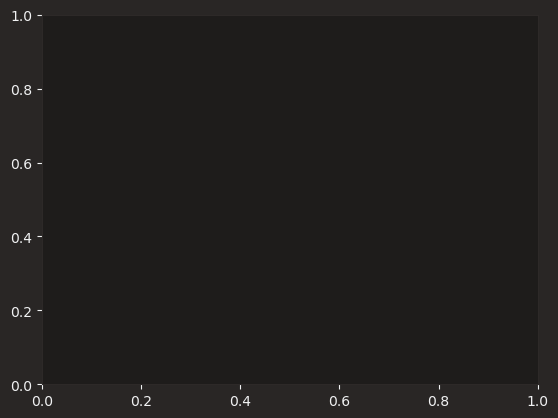

In [76]:
from matplotlib import pyplot as plt
import random

race = ff1.get_session(2021, 'Russia', 'R')
quali = ff1.get_session(2021, 'Russia', 'Q')
practice3 = ff1.get_session(2021, 'Russia', 'FP3')
laps = race.load_laps(with_telemetry=True)
fastLaps = quali.load_laps(with_telemetry=True)

laps_nor = laps.pick_driver('NOR')
laps_ham = laps.pick_driver('HAM')
quali_nor = fastLaps.pick_driver('NOR')
quali_ham = fastLaps.pick_driver('HAM')

fastest_nor = laps_nor.pick_fastest()
fastest_ham = laps_ham.pick_fastest()
qualifying_nor = quali_nor.pick_fastest()
qualifying_ham = quali_ham.pick_fastest()

raceTime_nor = fastest_nor['LapTime']
raceTime_ham = fastest_ham['LapTime']
qualiTime_nor = qualifying_nor['LapTime']
qualiTime_ham = qualifying_ham['LapTime']
nor_avg = (raceTime_nor + qualiTime_nor)/2
ham_avg = (raceTime_ham + qualiTime_ham)/2
nor_comp = fastest_nor['Compound']
ham_comp = fastest_ham['Compound']
nor_tireLife = fastest_nor['TyreLife']
ham_tireLife = fastest_ham['TyreLife']
freshTire_nor = fastest_nor['TyreLife']
freshTire_ham = fastest_ham['TyreLife']

print(nor_tireLife, ham_tireLife)
print(nor_comp, ham_comp)
print(nor_avg, ham_avg)

lapTime_ham = []
lapTime_nor = []
laps = []
# 20 Lap Simulation
nor_time = 1.39
ham_time = 1.40
count_nor = 0
count_ham = 0
nor_tireLife = 11
ham_tireLife = 17
for i in range(0, 20):
    laps.append(i)
    if freshTire_nor and count_nor != 2:
        nor_time += 0.07
        lapTime_nor.append(nor_time)
        count_nor += 1
    if freshTire_ham and count_ham != 2:
        ham_time += 0.07
        lapTime_ham.append(ham_time)
        count_ham += 1
    
    if nor_tireLife < 15:
        nor_time -= 0.05
        lapTime_nor.append(nor_time)
    elif nor_tireLife > 25:
        nor_time += 0.15
        lapTime_nor.append(nor_time)
    elif nor_tireLife > 30:
        if random.random() > 0.5:
            nor_time += 0.10
            lapTime_nor.append(nor_time)
        else: 
            nor_time -= 0.10
            lapTime_nor.append(nor_time)
        
    if ham_tireLife < 15:
        ham_time -= 0.05
        lapTime_ham.append(ham_time)
    elif ham_tireLife > 25:
        ham_time += 0.15
        lapTime_ham.append(ham_time)
    elif nor_tireLife > 30:
        if random.random() > 0.5:
            ham_time += 0.10
            lapTime_ham.append(ham_time)
        else: 
            ham_time += 0.10
            lapTime_ham.append(ham_time)
    
    nor_tireLife += 1
    ham_tireLife += 1
    
print(lapTime_nor)
print(lapTime_ham)
print(nor_tireLife, ham_tireLife)